In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.utils import resample

In [2]:
# Load the data from concrete.csv file
concrete_df = pd.read_csv('concrete.csv')
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
#Let's check the data types of each column
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
print(f"number of rows: {concrete_df.shape[0]} and number of cols: {concrete_df.shape[1]}")

number of rows: 1030 and number of cols: 9


In [5]:
# Let's see any null or missing values in data.
concrete_df.isna().any().all()
# There are no missing values in column.

False

In [6]:
# Generate descriptive statistics of concrete data
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [7]:
concrete_df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [8]:
#Let's see the concrete shape and head and tail.
print(f'Num of rows == {concrete_df.shape[0]} and Num of columns == {concrete_df.shape[1]}')
concrete_df.head(10)

Num of rows == 1030 and Num of columns == 9


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [9]:
concrete_df.tail(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1020,183.9,122.6,0.0,203.5,0.0,959.2,800.0,7,10.79
1021,203.5,305.3,0.0,203.5,0.0,963.4,630.0,3,9.56
1022,144.8,0.0,133.6,180.8,11.1,979.5,811.5,28,13.20
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7,10.39
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3,21.91
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


### univariate

Cement skew: 0.5094811788717731
min of cement: 102.0 and max of cement: 540.0


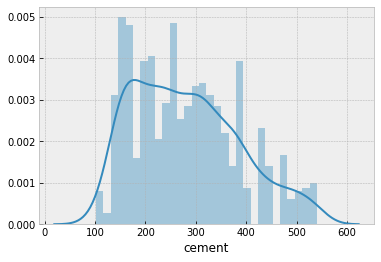

In [10]:
# Check the disrtibution on cement column data
sns.distplot(concrete_df.cement,bins=30,kde=True)

# Let's see the skewness of cement
print(f'Cement skew: {concrete_df.cement.skew()}')

print(f"min of cement: {concrete_df.cement.min()} and max of cement: {concrete_df.cement.max()}")
# As we can see the data almost distrbutted nomrally and bit postivally skewed.
# we can consider this.

In [11]:
# Rename the 'Blast' to 'blast_furnace_slag' for understanding purpose.
concrete_df['blast_furnace_slag'] = concrete_df.slag
concrete_df.drop(columns='slag',inplace=True)

blast_furnace_slag skew: 0.8007168956061774
min of blast_furnace_slag: 0.0 and max of blast_furnace_slag: 359.4


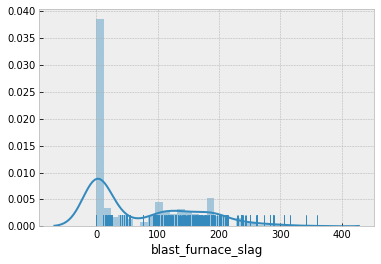

In [12]:
# Check the disrtibution on blast_furnace_slag column data
sns.distplot(concrete_df.blast_furnace_slag,bins=30,kde=True,rug=True)

# Let's see the skewness of cement
print(f'blast_furnace_slag skew: {concrete_df.blast_furnace_slag.skew()}')

print(f"min of blast_furnace_slag: {concrete_df.blast_furnace_slag.min()} and max of blast_furnace_slag: {concrete_df.blast_furnace_slag.max()}")
# As we can see the data are postivally skewed.
# And data is not normally distributted.


In [13]:
# let's check any values less than 0.0
print(f"Any values less than 0.0 count: {concrete_df.blast_furnace_slag[concrete_df.blast_furnace_slag < 0].count()}")

# let's check count of 0'zeros' in blast_furnace_slag.
blast_furnace_slag_zero_count = concrete_df.blast_furnace_slag[concrete_df.blast_furnace_slag == 0].count()
percent = len(concrete_df.blast_furnace_slag[concrete_df.blast_furnace_slag == 0]) / len(concrete_df.index) * 100
print(f"zeros in blast_furnace_slag: {blast_furnace_slag_zero_count} and percentage of distribution: {percent}")

Any values less than 0.0 count: 0
zeros in blast_furnace_slag: 471 and percentage of distribution: 45.728155339805824


* 'blast_furnace_slag' is added to concrete for improving the strength.
* Then concrete may or may not contain 'blast_furnace_slag'. So, then, 'blast_furnace_slag' may conatin 0 'zeros'.

In [14]:
# Rename the 'ash' to ' fly_ash' for understanding purpose.
concrete_df['fly_ash'] = concrete_df.ash
concrete_df.drop(columns='ash',inplace=True)

fly_ash skew: 0.5373539058066844
min of fly_ash: 0.0 and max of fly_ash: 200.1


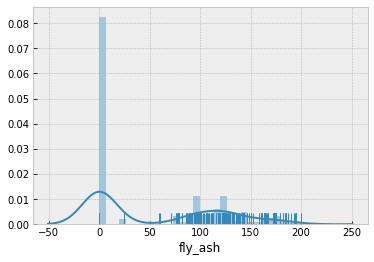

In [15]:
# Check the disrtibution on fly_ash column data
sns.distplot(concrete_df.fly_ash,bins=30,kde=True,rug=True)

# Let's see the skewness of cement
print(f'fly_ash skew: {concrete_df.fly_ash.skew()}')

print(f"min of fly_ash: {concrete_df.fly_ash.min()} and max of fly_ash: {concrete_df.fly_ash.max()}")
# As we can see the data are postivally skewed.
# And data is not normally distributted.


In [16]:
# let's check any values less than 0.0
print(f"Any values less than 0.0 count: {concrete_df.fly_ash[concrete_df.fly_ash < 0].count()}")

# let's check count of 0'zeros' in fly_ash.
fly_ash_zero_count = concrete_df.fly_ash[concrete_df.fly_ash == 0].count()
percent_fly_ash = len(concrete_df.fly_ash[concrete_df.fly_ash == 0]) / len(concrete_df.index) * 100
print(f"zeros in fly_ash: {fly_ash_zero_count} and percentage of distribution: {percent_fly_ash}")

Any values less than 0.0 count: 0
zeros in fly_ash: 566 and percentage of distribution: 54.95145631067962


water skew: 0.07462838428549402
min of water: 121.8 and max of water: 247.0


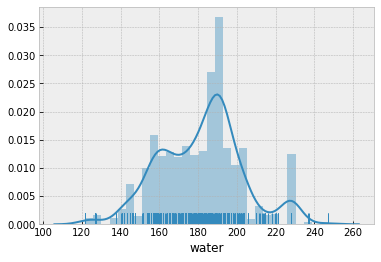

In [17]:
# Check the disrtibution on water column data
sns.distplot(concrete_df.water,bins=30,kde=True,rug=True)

# Let's see the skewness of water
print(f'water skew: {concrete_df.water.skew()}')

print(f"min of water: {concrete_df.water.min()} and max of water: {concrete_df.water.max()}")
# And data is almost normally distributted.


superplastic skew: 0.9072025748672466
min of superplastic: 0.0 and max of superplastic: 32.2


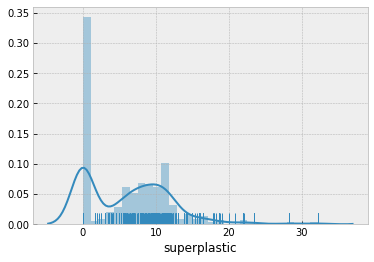

In [18]:
# Check the disrtibution on superplastic column data
sns.distplot(concrete_df.superplastic,bins=30,kde=True,rug=True)

# Let's see the skewness of superplastic
print(f'superplastic skew: {concrete_df.superplastic.skew()}')

print(f"min of superplastic: {concrete_df.superplastic.min()} and max of superplastic: {concrete_df.superplastic.max()}")
# As we can see the data are postivally skewed.

* Superplasticizers (SP's), also known as high range water reducers, are additives used in making high strength concrete.

In [19]:
# let's check any values less than 0.0
print(f"Any values less than 0.0 count: {concrete_df.superplastic[concrete_df.superplastic < 0].count()}")

# let's check count of 0'zeros' in superplastic.
superplasticfly_ash_zero_count = concrete_df.superplastic[concrete_df.superplastic == 0].count()
percent_superplastic = len(concrete_df.superplastic[concrete_df.superplastic == 0]) / len(concrete_df.index) * 100
print(f"zeros in superplastic: {superplasticfly_ash_zero_count} and percentage of distribution: {percent_superplastic}")

Any values less than 0.0 count: 0
zeros in superplastic: 379 and percentage of distribution: 36.79611650485437


coarseagg skew: -0.04021974481106704
min of coarseagg: 801.0 and max of coarseagg: 1145.0


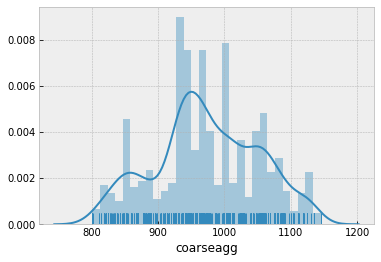

In [20]:
# Check the disrtibution on coarseagg column data
sns.distplot(concrete_df.coarseagg,bins=30,kde=True,rug=True)

# Let's see the skewness of coarseagg
print(f'coarseagg skew: {concrete_df.coarseagg.skew()}')

print(f"min of coarseagg: {concrete_df.coarseagg.min()} and max of coarseagg: {concrete_df.coarseagg.max()}")
# As we can see the data is normally distributted.

fineagg skew: -0.25300959769707143
min of fineagg: 594.0 and max of fineagg: 992.6


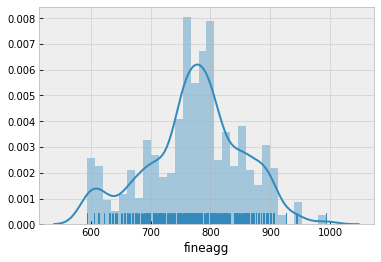

In [21]:
# Check the disrtibution on fineagg column data
sns.distplot(concrete_df.fineagg,bins=30,kde=True,rug=True)

# Let's see the skewness of fineagg
print(f'fineagg skew: {concrete_df.fineagg.skew()}')

print(f"min of fineagg: {concrete_df.fineagg.min()} and max of fineagg: {concrete_df.fineagg.max()}")
# As we can see the data is normally distributted.

age skew: 3.2691774006345895
min of age: 1 and max of age: 365


28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

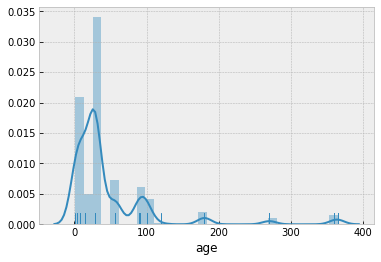

In [22]:
# Check the disrtibution on age column data
sns.distplot(concrete_df.age,bins=30,kde=True,rug=True)

# Let's see the skewness of age
print(f'age skew: {concrete_df.age.skew()}')

print(f"min of age: {concrete_df.age.min()} and max of age: {concrete_df.age.max()}")
# As we can see the data postively skewed.

#let's check individual age value counts
concrete_df.age.value_counts()

* Here, we can see 80% of the data is distributted in top 4 days. those are 28,3,7 and 56 days respectively.

strength skew: 0.41697728841071807
min of strength: 2.33 and max of strength: 82.6


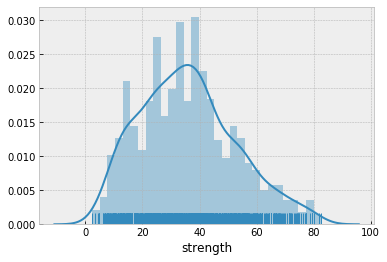

In [23]:
# Check the disrtibution on strength column data
sns.distplot(concrete_df.strength,bins=30,kde=True,rug=True)

# Let's see the skewness of strength
print(f'strength skew: {concrete_df.strength.skew()}')

print(f"min of strength: {concrete_df.strength.min()} and max of strength: {concrete_df.strength.max()}")
# As we can see the data is normally distributted.

* Concrete compressive strength requirements can vary from 2500 psi (17 MPa) for residential concrete to 4000 psi (28 MPa) and higher in commercial structures. Higher strengths up to and exceeding 10,000 psi (70 MPa) are specified for certain applications.
* And we have less than 17MPa and greater than 70Mpa. Need to check, how is it being influenced by indepented variables.

### Bivariate

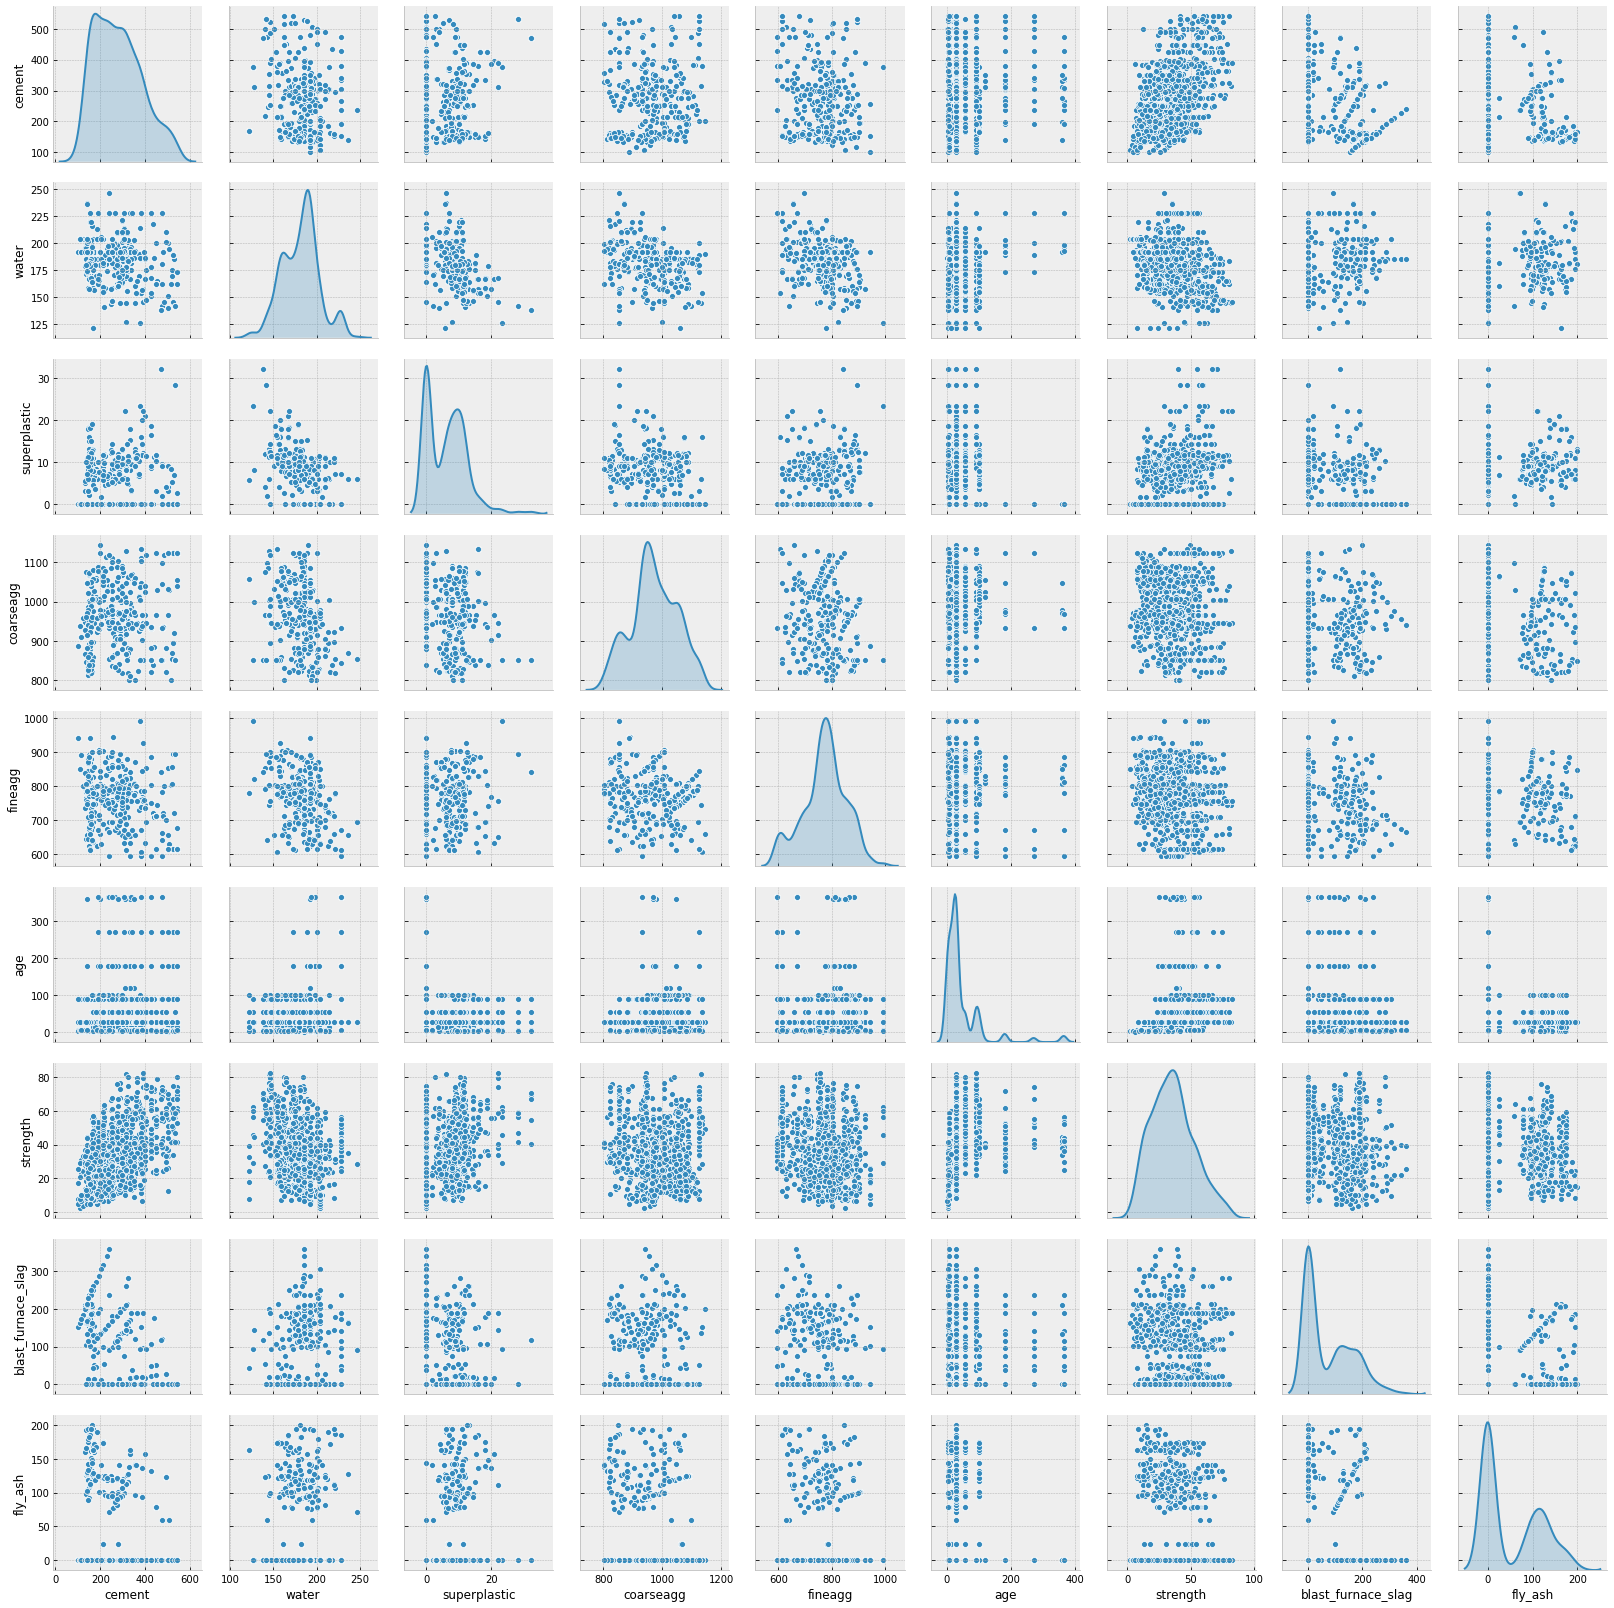

In [24]:
sns.pairplot(concrete_df,diag_kind = 'kde')

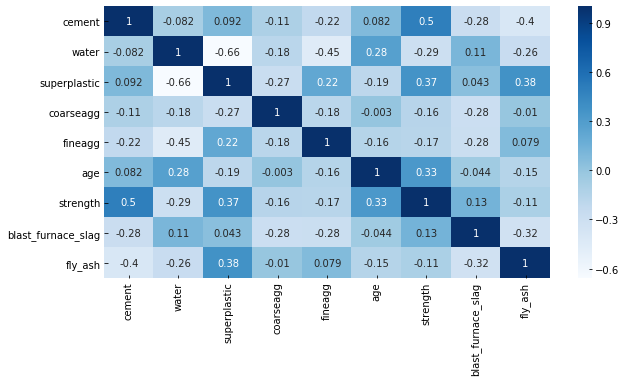

In [25]:
corr = concrete_df.corr()
plt.figure(figsize=(10,5),)
sns.heatmap(corr,annot=True,cmap='Blues',)

* As we can see cement, superplastic,age are positive correlation to the strength 
* But , where as water is negative correlation to the strength.
* As we go through the pariplot, we can see there are minimum 3 clusters.

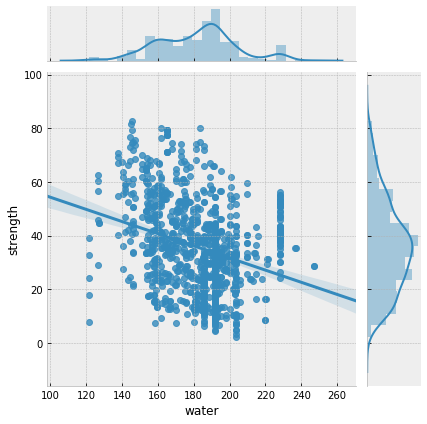

In [26]:
sns.jointplot('water','strength',data=concrete_df,kind='reg') 

[Text(0, 0, 'cement'),
 Text(0, 0, 'water'),
 Text(0, 0, 'superplastic'),
 Text(0, 0, 'coarseagg'),
 Text(0, 0, 'fineagg'),
 Text(0, 0, 'age'),
 Text(0, 0, 'strength'),
 Text(0, 0, 'blast_furnace_slag'),
 Text(0, 0, 'fly_ash')]

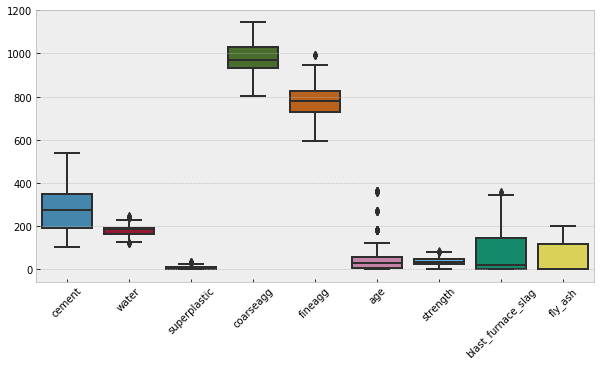

In [27]:
# lets check outliers in concrerte dataframe
plt.figure(figsize=(10,5),)
boxplt = sns.boxplot(data=concrete_df)
boxplt.set_xticklabels(boxplt.get_xticklabels(), rotation=45)

* As we can see, age has that long tail on right side. which are outliers.

## common code

In [28]:
def calculateAdjRSqr(y_test,r_squared,X_test):
    adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    return adjusted_r_squared

In [29]:
def measureError(y_test,y_pred,X_test):
    # Measuring error
    mse = mean_squared_error(y_test,y_pred)
    print(f'MSE: {mse}')
    r2Score = r2_score(y_test,y_pred)
    print(f'r2Score: {r2Score}')
    adj_r2_score = calculateAdjRSqr(y_test,r2Score,X_test)
    print(f'Adj_R2 score: {adj_r2_score}')
    return (mse,r2Score,adj_r2_score)

In [30]:
def calculatePredictionInterval(y_test,y_pred):# 95%
    y = y_test.to_numpy()
    y_hat = y_pred
    SSE = sum((y - y_hat)**2)
    stdev = np.sqrt(1/(len(y)-2) * SSE)
    # calculate prediction interval
    interval = 1.96 * stdev  # Here, 1.96 is for 95%
    print('Prediction Interval: %.3f' % interval)
    lower, upper = y - interval, y + interval
#     print(lower,upper)
    print('95%% likelihood that the true value is between %.3f and %.3f' % (lower[0], upper[0]))
    print(f'True Value {y_hat[0]}')

## scale the data

In [31]:
from scipy.stats import zscore

In [32]:
concrete_scaled_df_z = concrete_df.apply(zscore)

In [33]:
X = concrete_scaled_df_z.drop(columns=['strength'])
y = concrete_scaled_df_z.strength

## train test and split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

### Let's check accuracy of models like SVR, LinearRegression with actual data

In [36]:
svr = SVR()
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
svr_train_score = svr.score(X_train,y_train)
svr_test_score = svr.score(X_test,y_test)
print(f"Train score: {svr_train_score}")
print(f"Test score: {svr_test_score}")
svr_pred = svr.predict(X_test)
corr_svr, p_val_svr = pearsonr(y_test,svr_pred)
print(f"pearsonr Values: {corr_svr} {p_val_svr}")

Train score: 0.8780629706382833
Test score: 0.8104933679836134
pearsonr Values: 0.9007246641565129 3.4068041383259066e-113


In [38]:
# Measuring error
svr_mse, svr_r2_score, svr_adj_r2_score = measureError(y_test,svr_pred,X_test)

MSE: 0.18120999375114974
r2Score: 0.8104933679836134
Adj_R2 score: 0.8054398577965097


In [39]:
calculatePredictionInterval(y_test,svr_pred)

Prediction Interval: 0.837
95% likelihood that the true value is between -0.629 and 1.045
True Value 0.21431578180760194


In [40]:
svr_dict = {'model_name':'SVR',
            'data_consideration':'considering whole data',
            'train_score': [svr_train_score],
            'test_score':[svr_test_score],
            'corrcoeff':[corr_svr],
            'p_val':[p_val_svr],
            'MSE': [svr_mse],
            'R2_score': [svr_r2_score],
            'Adj_R2_score':[svr_adj_r2_score]
           }
tracker_df = pd.DataFrame(svr_dict)
tracker_df.head()

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val,MSE,R2_score,Adj_R2_score
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113,0.18121,0.810493,0.80544


In [41]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
LR_train_score = LR.score(X_train,y_train)
LR_test_score = LR.score(X_test,y_test)
print(f"Train score: {LR_train_score}")
print(f"Test score: {LR_test_score}")
LR_pred = LR.predict(X_test)
corr_LR, p_val_LR = pearsonr(y_test,LR_pred)
print(f"pearsonr Values: {corr_LR} {p_val_LR}")

Train score: 0.6271470626341014
Test score: 0.5845101408706102
pearsonr Values: 0.7669523589956694 4.2077168312113206e-61


In [43]:
# Measuring error
LR_mse, LR_r2_score, LR_adj_r2_score = measureError(y_test,LR_pred,X_test)

MSE: 0.3972996299675277
r2Score: 0.5845101408706102
Adj_R2 score: 0.5734304112938264


In [44]:
calculatePredictionInterval(y_test,LR_pred)

Prediction Interval: 1.239
95% likelihood that the true value is between -1.032 and 1.447
True Value -0.2576631418968849


In [45]:
LR_dict = {'model_name':'LineraRegression',
            'data_consideration':'considering whole data',
            'train_score': [LR_train_score],
            'test_score':[LR_test_score],
            'corrcoeff':[corr_LR],
            'p_val':[p_val_LR],
            'MSE': [LR_mse],
            'R2_score': [LR_r2_score],
            'Adj_R2_score':[LR_adj_r2_score]
           }
df = pd.DataFrame(LR_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head()

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val,MSE,R2_score,Adj_R2_score
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113,0.18121,0.810493,0.80544
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61,0.39730,0.584510,0.57343


In [46]:
DT = DecisionTreeRegressor(max_depth=4)
DT.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [47]:
DT_train_score = DT.score(X_train,y_train)
DT_test_score = DT.score(X_test,y_test)
print(f"Train score: {DT_train_score}")
print(f"Test score: {DT_test_score}")
DT_pred = DT.predict(X_test)
corr_DT, p_val_DT = pearsonr(y_test,DT_pred)
print(f"pearsonr Values: {corr_DT} {p_val_DT}")

Train score: 0.7286342678873313
Test score: 0.6655614189464814
pearsonr Values: 0.8161446208156032 4.1904192237152316e-75


In [48]:
# Measuring error
DT_mse, DT_r2_score, DT_adj_r2_score = measureError(y_test,DT_pred,X_test)

MSE: 0.31979679306216113
r2Score: 0.6655614189464814
Adj_R2 score: 0.6566430567850542


In [49]:
calculatePredictionInterval(y_test,DT_pred)

Prediction Interval: 1.112
95% likelihood that the true value is between -0.904 and 1.320
True Value 0.47109589706284055


In [50]:
DT_dict = {'model_name':'Decision Tree Regressor',
            'data_consideration':'considering whole data',
            'train_score': [DT_train_score],
            'test_score':[DT_test_score],
            'corrcoeff':[corr_DT],
            'p_val':[p_val_DT],
            'MSE': [DT_mse],
            'R2_score': [DT_r2_score],
            'Adj_R2_score':[DT_adj_r2_score]
           }
df = pd.DataFrame(DT_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head()

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val,MSE,R2_score,Adj_R2_score
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113,0.181210,0.810493,0.805440
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61,0.397300,0.584510,0.573430
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75,0.319797,0.665561,0.656643


* As we can see, SVR is giving good score.
* Where as DecisionTree and LinearRegression score are in same range.

## KMeans

In [51]:
# Before taking action on outliers, we build K-Means cluster. 
# Let's see , number of cluster in data. Then, will see how strongly independent variables influence strength.

In [52]:
from sklearn.cluster import KMeans

In [53]:
inertia = []
cluster_range = range(3,15)
for k in cluster_range:
    kModel = KMeans(n_clusters=k)
    kModel.fit(concrete_df)
    inertia.append(kModel.inertia_)

cluster_df = pd.DataFrame({"clusters": cluster_range, "errors": inertia})
cluster_df

,clusters,errors
0,3,2.499578e+07
1,4,2.198916e+07
2,5,1.953573e+07
3,6,1.776347e+07
4,7,1.617156e+07
5,8,1.478938e+07
6,9,1.343621e+07
7,10,1.245840e+07
8,11,1.142598e+07
9,12,1.079047e+07


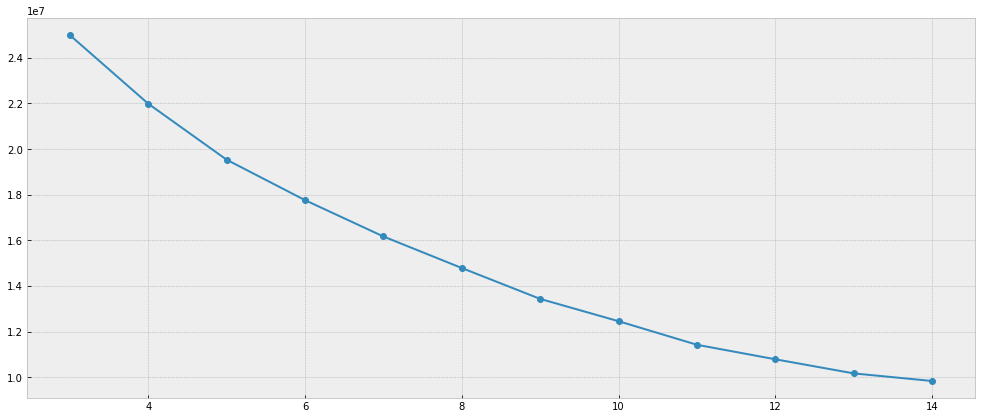

In [54]:
plt.figure(figsize=(15,7))
plt.plot(cluster_df.clusters,cluster_df.errors, marker = 'o')

* Here, we go for 7 clusters.

In [55]:
kModel = KMeans(n_clusters=7)
kModel.fit(concrete_scaled_df_z)
labels = kModel.labels_

In [56]:
concrete_cluster_df_z_copy = concrete_scaled_df_z.copy(True)

In [57]:
concrete_cluster_df_z_copy.head()

,cement,water,superplastic,coarseagg,fineagg,age,strength,blast_furnace_slag,fly_ash
0,-1.339017,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018,1.601441,-0.847144
1,-1.074790,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108,-0.367541,1.096078
2,-0.298384,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144,-0.856888,0.648965
3,-0.145209,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806,0.465044,-0.847144
4,-1.209776,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727,1.269798,-0.847144


In [58]:
predictions = kModel.predict(concrete_scaled_df_z)

In [59]:
concrete_cluster_df_z_copy['class'] = predictions

In [60]:
concrete_cluster_df_z_copy.head()

,cement,water,superplastic,coarseagg,fineagg,age,strength,blast_furnace_slag,fly_ash,class
0,-1.339017,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018,1.601441,-0.847144,2
1,-1.074790,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108,-0.367541,1.096078,1
2,-0.298384,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144,-0.856888,0.648965,1
3,-0.145209,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806,0.465044,-0.847144,2
4,-1.209776,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727,1.269798,-0.847144,2


In [61]:
concrete_cluster_df_z_copy['class'].unique()

array([2, 1, 0, 6, 5, 4, 3])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b98ff28>,
      dtype=object)

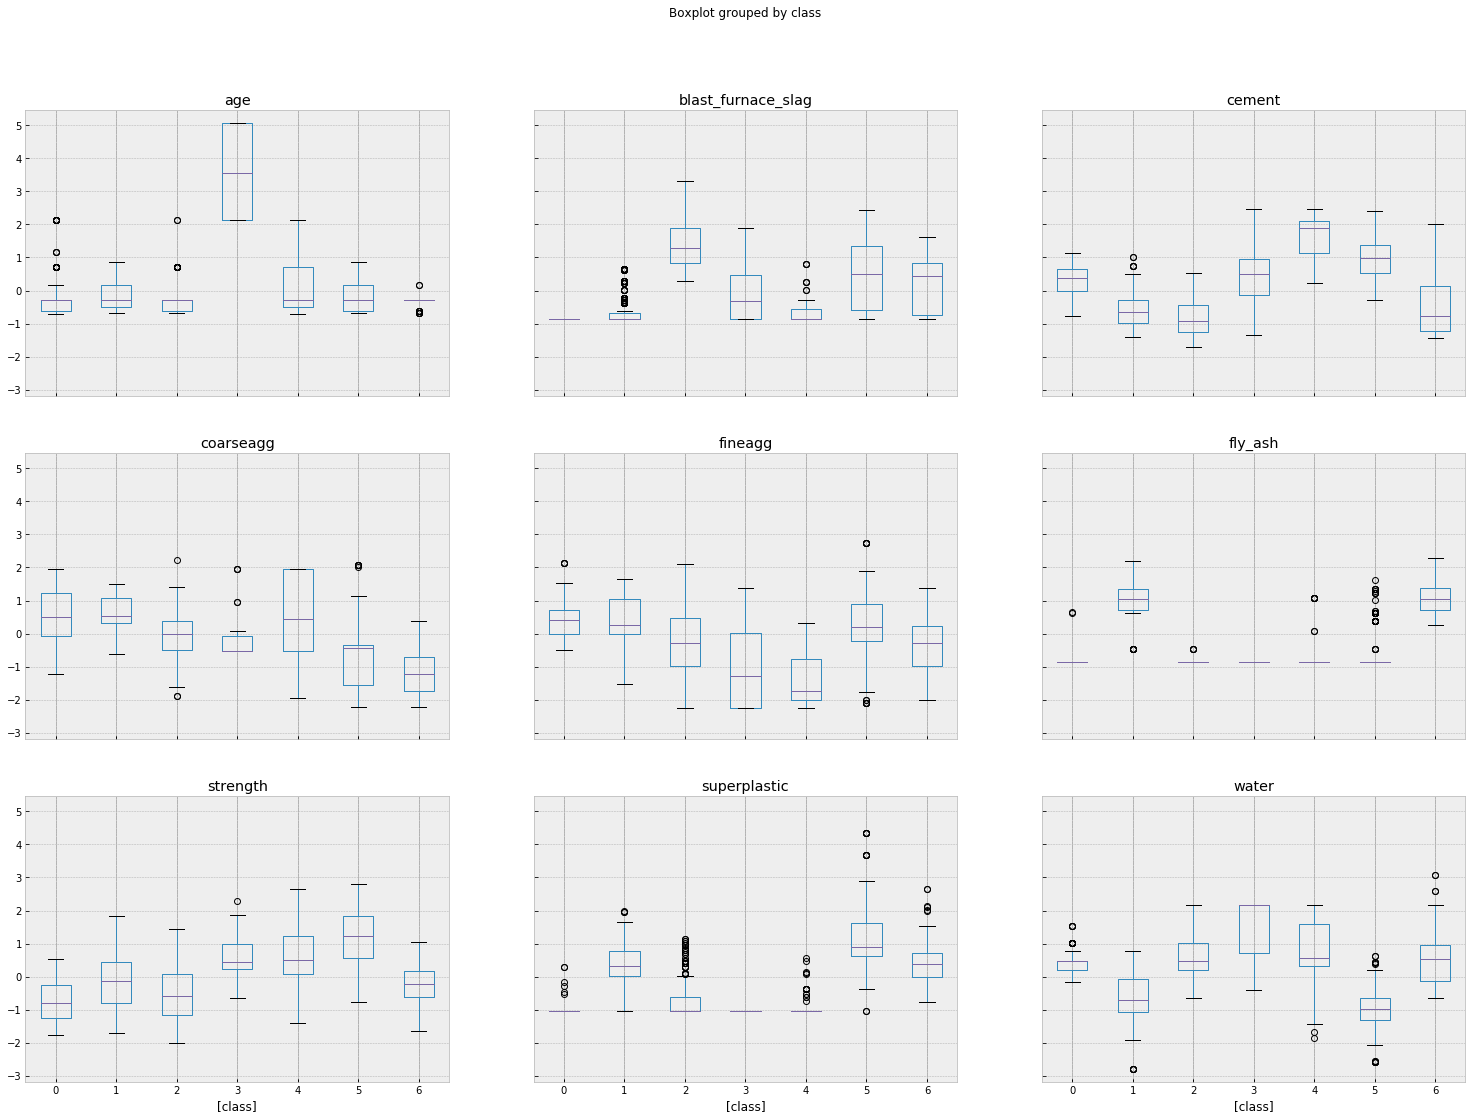

In [62]:
concrete_cluster_df_z_copy.boxplot(by='class', figsize=(25,18))

In [63]:
# Almots all classes have outliers.
# By seeing these boxplot, let check with  capping method .
percentile_95 = concrete_cluster_df_z_copy.quantile(0.95)
percentile_5 = concrete_cluster_df_z_copy.quantile(0.05)

IQR = percentile_95 - percentile_5
temp_df = concrete_cluster_df_z_copy[~((concrete_cluster_df_z_copy < (percentile_5 - 1.5 * IQR)) | (concrete_cluster_df_z_copy > (percentile_95 + 1.5 * IQR))).any(axis=1) ]
print(f"Shape of original data {concrete_cluster_df_z_copy.shape} , Shape of outlier_drop: {temp_df.shape}")
print(f"After removing  ")

Shape of original data (1030, 10) , Shape of outlier_drop: (1030, 10)
After removing  


In [64]:
# Almots all classes have outliers.
# By seeing these boxplot, let check with  normal IQR method .
percentile_75 = concrete_cluster_df_z_copy.quantile(0.75)
percentile_25 = concrete_cluster_df_z_copy.quantile(0.25)

IQR = percentile_75 - percentile_25
nomral_IQ_df = concrete_cluster_df_z_copy[~((concrete_cluster_df_z_copy < (percentile_25 - 1.5 * IQR)) | (concrete_cluster_df_z_copy > (percentile_75 + 1.5 * IQR))).any(axis=1) ]
print(f"Shape of original data {concrete_cluster_df_z_copy.shape} , Shape of outlier_drop: {nomral_IQ_df.shape}")
print(f"After removing  ")

Shape of original data (1030, 10) , Shape of outlier_drop: (941, 10)
After removing  


In [65]:
# By seeing above comparison, we go for replacing outliers with are above 2*std with median
# instead of removing/ droppping outliers
def replaceOutliers(group):
    median, std = group.median(), group.std()  
    outliers = (group - median).abs() > 2*std 
    group[outliers] = group.median()       
    return group

outlier_corrected_group_df = (concrete_cluster_df_z_copy.groupby('class').transform(replaceOutliers)) 
outlier_corrected_df = outlier_corrected_group_df.join(pd.DataFrame(concrete_cluster_df_z_copy['class']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bdc4390>,
      dtype=object)

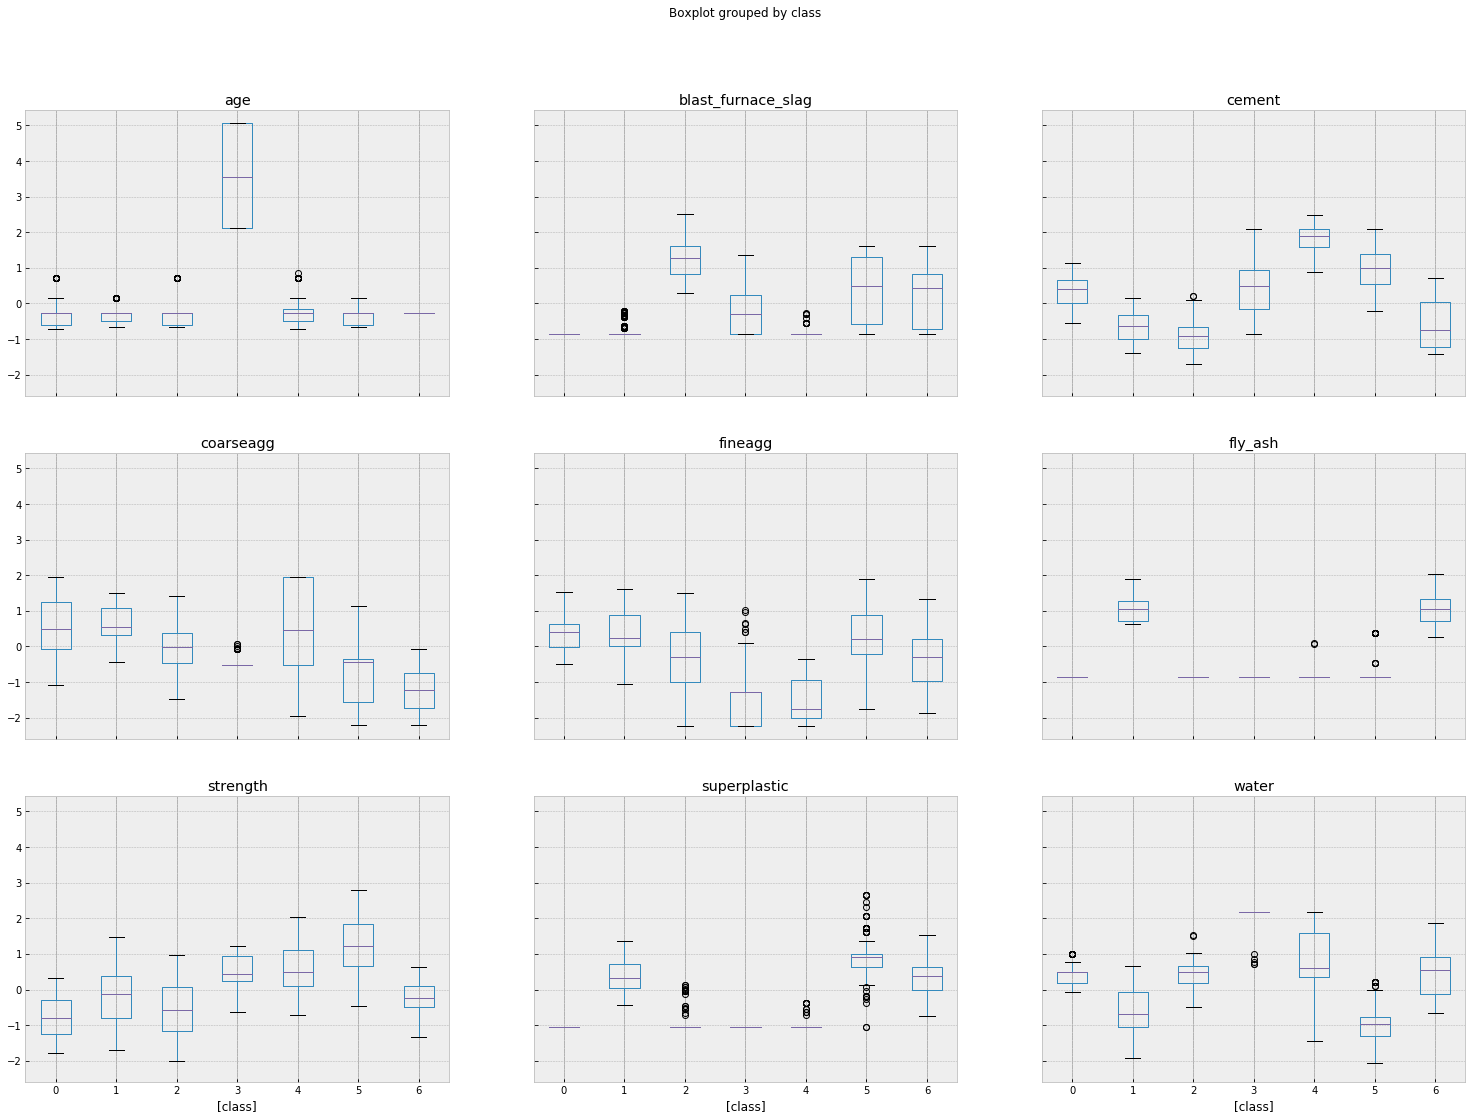

In [66]:
outlier_corrected_df.boxplot(by='class', figsize=(25,18))

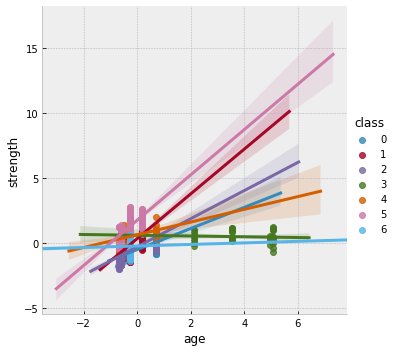

In [67]:
sns.lmplot('age','strength',data=outlier_corrected_df,hue='class')

* In this we can see, the orange line class 5 and 2, which are parallel to the x axis. 
* But considerably, which is strong positive correation to the strength.

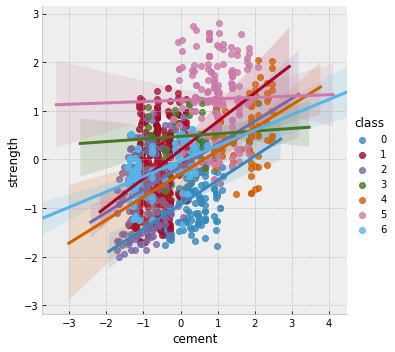

In [68]:
sns.lmplot('cement','strength',data=outlier_corrected_df,hue='class')

* Out of 7, 2 cluster class of age are parllel, 
* But considerably, which is strong positive correation to the strength.

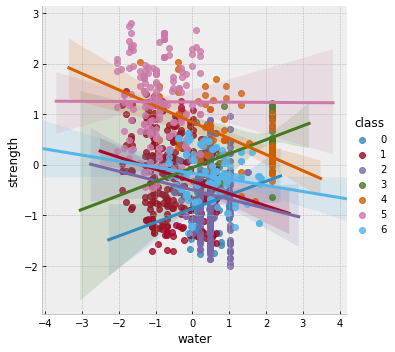

In [69]:
sns.lmplot('water','strength',data=outlier_corrected_df,hue='class')

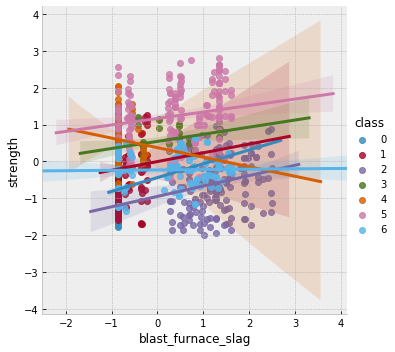

In [70]:
sns.lmplot('blast_furnace_slag','strength',data=outlier_corrected_df,hue='class')

* Here, which are almost all cluster class are parllel to x_axis. Which says 'blast_furnace_slag' feature is not strongly influencing the 'Strength'.
* Each cluster data residual is high.

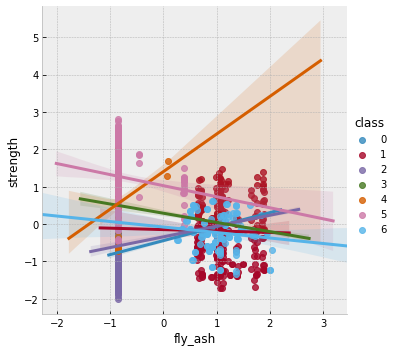

In [71]:
sns.lmplot('fly_ash','strength',data=outlier_corrected_df,hue='class')

* fly_ash is not good influencer to strength

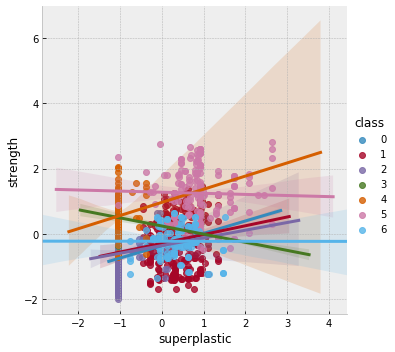

In [72]:
sns.lmplot('superplastic','strength',data=outlier_corrected_df,hue='class')

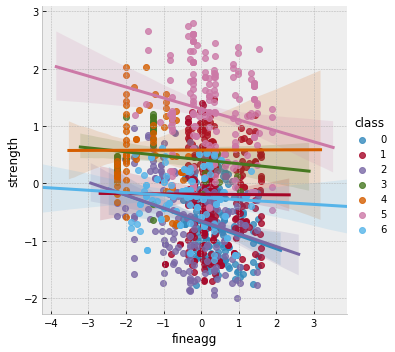

In [73]:
sns.lmplot('fineagg','strength',data=outlier_corrected_df,hue='class')

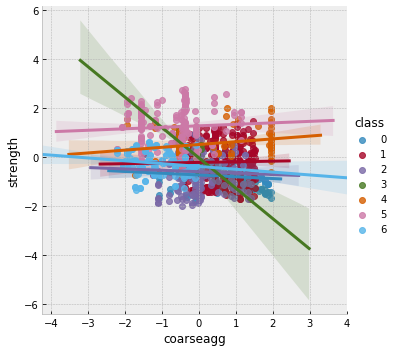

In [74]:
sns.lmplot('coarseagg','strength',data=outlier_corrected_df,hue='class')

* coarseagg is very weak independent variable .
* By seeing its cluster distribution, we can drop this variable.

* From this KMeans cluster analyse, I can say that, 
* compare to other variables, cement is strong influence on strength of the concrete.
* And Water has negative correation with strength.

In [75]:
## Let's try DecisionTreeRegressor algo for finding best features.

In [76]:
drop_cols = ['strength','class']
new_X = concrete_cluster_df_z_copy.drop(columns=drop_cols)
new_y = concrete_cluster_df_z_copy['strength']

X_train, X_test, y_train, y_test = train_test_split(new_X,new_y,test_size=0.3, random_state=42)

In [77]:
DT_rg = DecisionTreeRegressor(max_depth=4)
DT_rg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [78]:
print(f"Train score: {DT_rg.score(X_train,y_train)}")
print(f"Test score: {DT_rg.score(X_test,y_test)}")

Train score: 0.7286342678873313
Test score: 0.6655614189464814


pearsonr = 0.8161446208156033; p_val=4.1904192237147554e-75


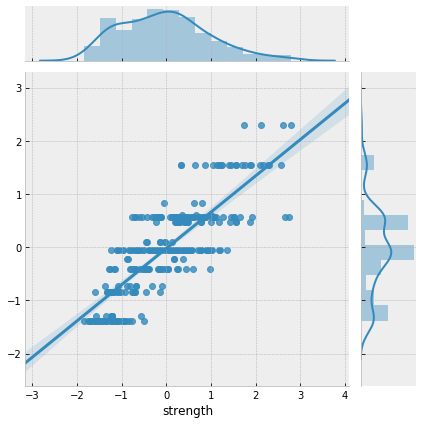

In [79]:
y_pred = DT_rg.predict(X_test)

sns.jointplot(y_test,y_pred,kind='reg')
corr,p_val = pearsonr(y_test,y_pred)
print(f"pearsonr = {corr}; p_val={p_val}")

* Here,I am looking for 95% linear relationship between y_test and y_pred

In [80]:
zipped = sorted(list(zip(X_train.columns,DT_rg.feature_importances_)),key = lambda x: x[1],reverse=True)
print(dict(zipped))

{'cement': 0.4582750785820687, 'age': 0.3508490514332874, 'blast_furnace_slag': 0.12780062685447707, 'water': 0.05803626246433488, 'superplastic': 0.005038980665831991, 'coarseagg': 0.0, 'fineagg': 0.0, 'fly_ash': 0.0}


* As you can see, "cement and age" are strongly influence the strength of the concrete.

In [81]:
# Let's comapre all models with important features.

In [82]:
drop_cols = ['strength','superplastic','coarseagg','fineagg','fly_ash','class']
new_X = concrete_cluster_df_z_copy.drop(columns=drop_cols)
new_y = concrete_cluster_df_z_copy['strength']

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X,new_y,test_size=0.3, random_state=42)

In [83]:
## Decision Tree Regressor model with cement,age and water independent variables.
DTRG = DecisionTreeRegressor(max_depth=4)
DTRG.fit(new_X_train,new_y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [84]:
DTRG_train_score = DTRG.score(new_X_train,new_y_train)
DTRG_test_score = DTRG.score(new_X_test,new_y_test)
print(f"Train score: {DTRG_train_score}")
print(f"Test score: {DTRG_test_score}")

Train score: 0.727600166246314
Test score: 0.663691710835695


pearsonr = 0.8150619790745425; p_val=9.429331306221323e-75


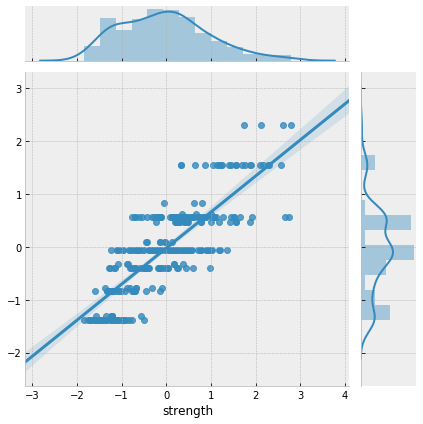

In [85]:
DTRG_y_pred = DTRG.predict(new_X_test)
sns.jointplot(new_y_test,DTRG_y_pred,kind='reg')
corr_DTRG,p_val_DTRG = pearsonr(new_y_test,DTRG_y_pred)
print(f"pearsonr = {corr_DTRG}; p_val={p_val_DTRG}")

In [86]:
calculatePredictionInterval(new_y_test,DTRG_y_pred)

Prediction Interval: 1.115
95% likelihood that the true value is between -0.907 and 1.323
True Value 0.4710958970628406


In [87]:
DTRG_mse,DTRG_r2_score, DTRG_adj_r2_score = measureError(new_y_test,DTRG_y_pred,new_X_test)

MSE: 0.32158464497777517
r2Score: 0.663691710835695
Adj_R2 score: 0.6592666017677435


In [88]:
DTRG_dict = {'model_name':'Decision Tree Regressor',
            'data_consideration':'considering DecisionTree important features',
            'train_score': [DTRG_train_score],
            'test_score':[DTRG_test_score],
            'corrcoeff':[corr_DTRG],
            'p_val':[p_val_DTRG],
            'MSE': [DTRG_mse],
            'R2_score': [DTRG_r2_score],
            'Adj_R2_score':[DTRG_adj_r2_score]
           }
df = pd.DataFrame(DTRG_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head()

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val,MSE,R2_score,Adj_R2_score
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113,0.181210,0.810493,0.805440
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61,0.397300,0.584510,0.573430
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75,0.319797,0.665561,0.656643
0,Decision Tree Regressor,considering DecisionTree important features,0.727600,0.663692,0.815062,9.429331e-75,0.321585,0.663692,0.659267


In [89]:
## Suppor Vector Regressor model with cement,age and water independent variables.
SVR_ = SVR()
SVR_.fit(new_X_train,new_y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [90]:
SVR_train_score = SVR_.score(new_X_train,new_y_train)
SVR_test_score = SVR_.score(new_X_test,new_y_test)
print(f"Train score: {SVR_train_score}")
print(f"Test score: {SVR_test_score}")

Train score: 0.8630271530782901
Test score: 0.812201069773876


pearsonr = 0.9012289411479346; p_val=1.622934917923041e-113


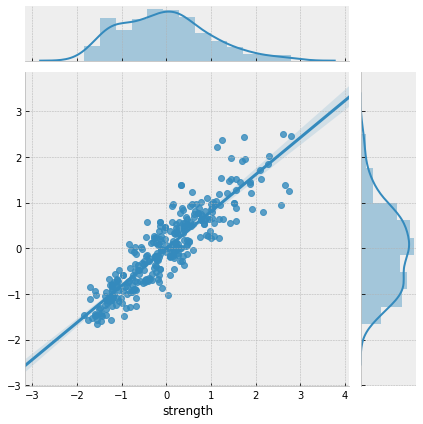

In [91]:
SVR_y_pred = SVR_.predict(new_X_test)
sns.jointplot(new_y_test,SVR_y_pred,kind='reg')
corr_SVR_,p_val_SVR_ = pearsonr(new_y_test,SVR_y_pred)
print(f"pearsonr = {corr_SVR_}; p_val={p_val_SVR_}")

In [92]:
SVR_mse,SVR_r2_score, SVR_adj_r2_score = measureError(new_y_test,SVR_y_pred,new_X_test)

MSE: 0.17957705548693345
r2Score: 0.812201069773876
Adj_R2 score: 0.809730031218269


In [93]:
calculatePredictionInterval(new_y_test,SVR_y_pred)

Prediction Interval: 0.833
95% likelihood that the true value is between -0.625 and 1.041
True Value -0.047530248954716095


In [94]:
SVR_dict = {'model_name':'SVR',
            'data_consideration':'considering DecisionTree important features',
            'train_score': [SVR_train_score],
            'test_score':[SVR_test_score],
            'corrcoeff':[corr_SVR_],
            'p_val':[p_val_SVR_],
            'MSE': [SVR_mse],
            'R2_score': [SVR_r2_score],
            'Adj_R2_score':[SVR_adj_r2_score]
           }
df = pd.DataFrame(SVR_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head()

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val,MSE,R2_score,Adj_R2_score
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113,0.181210,0.810493,0.805440
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61,0.397300,0.584510,0.573430
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75,0.319797,0.665561,0.656643
0,Decision Tree Regressor,considering DecisionTree important features,0.727600,0.663692,0.815062,9.429331e-75,0.321585,0.663692,0.659267
0,SVR,considering DecisionTree important features,0.863027,0.812201,0.901229,1.622935e-113,0.179577,0.812201,0.809730


In [95]:
LR_ = LinearRegression()
LR_.fit(new_X_train,new_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
LR_train_score = LR_.score(new_X_train,new_y_train)
LR_test_score = LR_.score(new_X_test,new_y_test)
print(f"Train score: {LR_train_score}")
print(f"Test score: {LR_test_score}")

Train score: 0.571116314918106
Test score: 0.5224927026640598


pearsonr = 0.7253530421277397; p_val=1.0207295154272699e-51


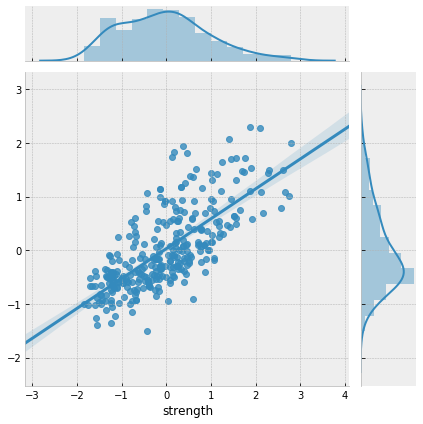

In [97]:
LR_y_pred = LR_.predict(new_X_test)
sns.jointplot(new_y_test,LR_y_pred,kind='reg')
corr_LR_,p_val_LR_ = pearsonr(new_y_test,LR_y_pred)
print(f"pearsonr = {corr_LR_}; p_val={p_val_LR_}")

In [98]:
calculatePredictionInterval(new_y_test,LR_y_pred)

Prediction Interval: 1.329
95% likelihood that the true value is between -1.121 and 1.537
True Value -0.2881620729669904


In [99]:
LR_mse,LR_r2_score, LR_adj_r2_score = measureError(new_y_test,LR_y_pred,new_X_test)

MSE: 0.45660193232124974
r2Score: 0.5224927026640598
Adj_R2 score: 0.5162097119096396


In [100]:
LR_dict = {'model_name':'Linear Regression',
            'data_consideration':'considering DecisionTree important features',
            'train_score': [LR_train_score],
            'test_score':[LR_test_score],
            'corrcoeff':[corr_LR_],
            'p_val':[p_val_LR_],
            'MSE': [LR_mse],
            'R2_score': [LR_r2_score],
            'Adj_R2_score':[LR_adj_r2_score]
           }
df = pd.DataFrame(LR_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head(10)

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val,MSE,R2_score,Adj_R2_score
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113,0.181210,0.810493,0.805440
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61,0.397300,0.584510,0.573430
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75,0.319797,0.665561,0.656643
0,Decision Tree Regressor,considering DecisionTree important features,0.727600,0.663692,0.815062,9.429331e-75,0.321585,0.663692,0.659267
0,SVR,considering DecisionTree important features,0.863027,0.812201,0.901229,1.622935e-113,0.179577,0.812201,0.809730
0,Linear Regression,considering DecisionTree important features,0.571116,0.522493,0.725353,1.020730e-51,0.456602,0.522493,0.516210


## Let's try PCA

In [101]:
from sklearn.decomposition import PCA

In [102]:
pca_model = PCA(n_components=8)
pca_model.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [103]:
# eigen Values
print(pca_model.explained_variance_)

[2.27583097 1.47191323 1.37537608 1.02156341 0.95734848 0.79811038
 0.17895588 0.02630381]


In [104]:
# eigenVector
print(pca_model.components_)

[[ 0.08494622  0.54669815 -0.49599773  0.01981529 -0.40400991  0.3068909
   0.19547299 -0.3897219 ]
 [-0.18632695  0.03484498  0.27028315 -0.58900146  0.02590774 -0.1404092
   0.70842896 -0.14776616]
 [ 0.81392973 -0.21555845  0.24847906 -0.17684328 -0.04920393  0.02458861
  -0.10018987 -0.43008596]
 [-0.01223847  0.23890734 -0.0370397  -0.54846045  0.46841785  0.53834884
  -0.34261143  0.11821742]
 [ 0.12734397  0.10258109  0.38358867 -0.12384593 -0.64725112  0.28241953
  -0.02481389  0.55809679]
 [-0.16875112 -0.40025628  0.19123557  0.35925327  0.08125401  0.71539079
   0.29936023 -0.19411664]
 [ 0.24235445 -0.50600706 -0.65482931 -0.2222167  -0.03571165  0.06375717
   0.24602272  0.37572865]
 [-0.43818481 -0.41181753 -0.07284752 -0.3561197  -0.43296296 -0.00833135
  -0.42630817 -0.37014511]]


In [105]:
# The percentage of variation explained by each eigen Vector
print(pca_model.explained_variance_ratio_)

[0.28077952 0.18159657 0.16968634 0.12603488 0.1181124  0.09846647
 0.02207859 0.00324522]


Text(0.5, 0, 'eigen values')

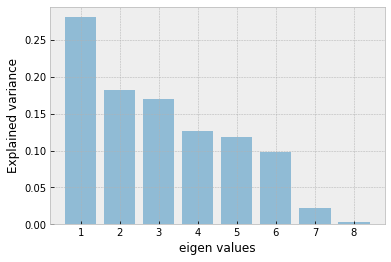

In [106]:
plt.bar(list(range(1,9)),pca_model.explained_variance_ratio_,alpha=0.5,align='center')
plt.ylabel("Explained variance")
plt.xlabel("eigen values")

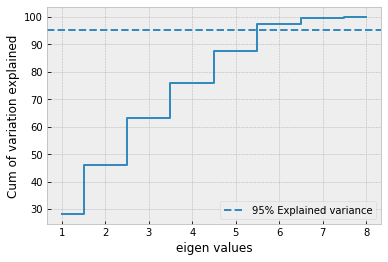

In [107]:
plt.step(list(range(1,9)),np.cumsum(pca_model.explained_variance_ratio_)*100,where='mid')
plt.axhline(y=95,linestyle='--',label='95% Explained variance')
plt.ylabel("Cum of variation explained")
plt.xlabel("eigen values")
plt.legend(loc='lower right')

In [108]:
# As we can see the steps graph, shows 6 dimesions are important.

In [109]:
pca_train = PCA(n_components=7)
pca_train.fit(X_train)
Xpca_train = pca_train.transform(X_train)

In [110]:
pca_test = PCA(n_components=7)
pca_test.fit(X_test)
Xpca_test = pca_test.transform(X_test)

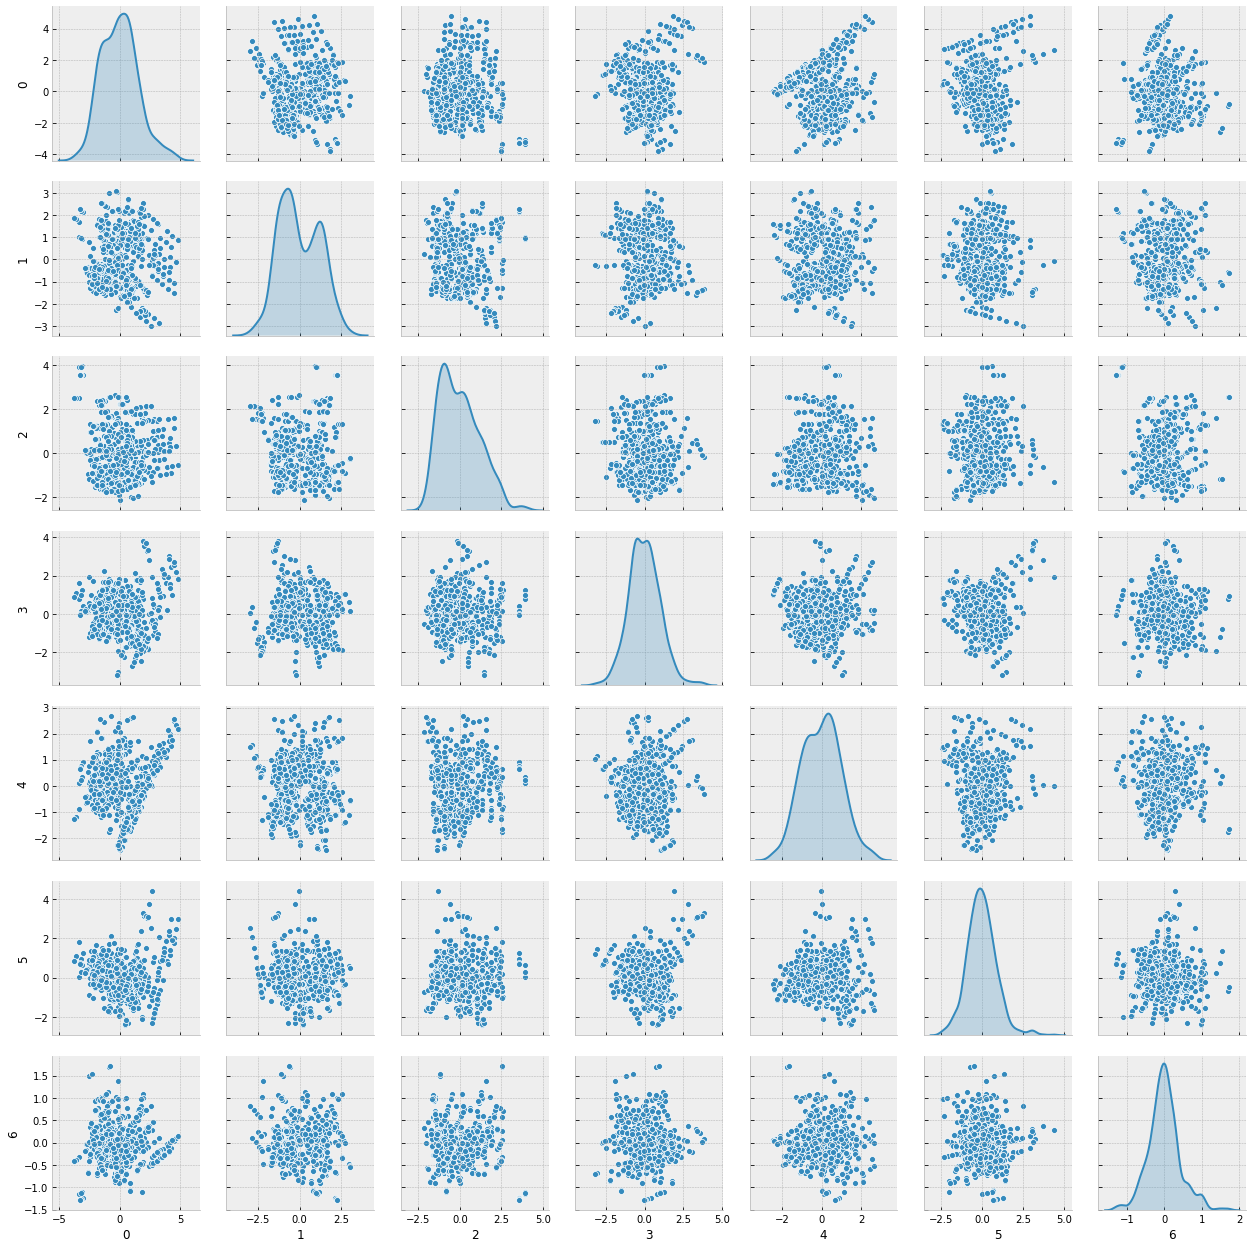

In [111]:
sns.pairplot(pd.DataFrame(Xpca_train),diag_kind = 'kde')

#### Let's try all models like SVR,LinearRegression and DecisionTreeRegressor with PCA data

In [112]:
DTRG_pca = DecisionTreeRegressor(max_depth=6)
DTRG_pca.fit(Xpca_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [113]:
DTRG_pca_train_score = DTRG_pca.score(Xpca_train,y_train)
DTRG_pca_test_score = DTRG_pca.score(Xpca_test,y_test)
print(f"Train score: {DTRG_pca_train_score}")
print(f"Test score: {DTRG_pca_test_score}")

Train score: 0.7907091766032659
Test score: 0.221142682403304


pearsonr = 0.5331988986221077; p_val=4.253735967337009e-24


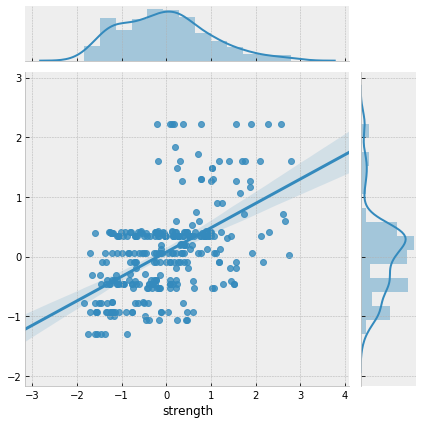

In [114]:
DTRG_pca_y_pred = DTRG_pca.predict(Xpca_test)
sns.jointplot(y_test,DTRG_pca_y_pred,kind='reg')
corr_DTRG_pca,p_val_DTRG_pca = pearsonr(y_test,DTRG_pca_y_pred)
print(f"pearsonr = {corr_DTRG_pca}; p_val={p_val_DTRG_pca}")

In [115]:
calculatePredictionInterval(y_test,DTRG_pca_y_pred)

Prediction Interval: 1.697
95% likelihood that the true value is between -1.489 and 1.905
True Value -0.19810961699325666


In [116]:
DTRG_pca_mse,DTRG_pca_r2_score, DTRG_pca_adj_r2_score = measureError(y_test,DTRG_pca_y_pred,Xpca_test)

MSE: 0.7447587884023524
r2Score: 0.22114268240330404
Adj_R2 score: 0.20302972152896226


In [117]:
DTRG_pca_dict = {'model_name':'Decision Tree Regression',
            'data_consideration':'considering PCA data',
            'train_score': [DTRG_pca_train_score],
            'test_score':[DTRG_pca_test_score],
            'corrcoeff':[corr_DTRG_pca],
            'p_val':[p_val_DTRG_pca],
            'MSE': [DTRG_pca_mse],
            'R2_score': [DTRG_pca_r2_score],
            'Adj_R2_score':[DTRG_pca_adj_r2_score]
           }
df = pd.DataFrame(DTRG_pca_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head(20)

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val,MSE,R2_score,Adj_R2_score
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113,0.181210,0.810493,0.805440
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61,0.397300,0.584510,0.573430
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75,0.319797,0.665561,0.656643
0,Decision Tree Regressor,considering DecisionTree important features,0.727600,0.663692,0.815062,9.429331e-75,0.321585,0.663692,0.659267
0,SVR,considering DecisionTree important features,0.863027,0.812201,0.901229,1.622935e-113,0.179577,0.812201,0.809730
0,Linear Regression,considering DecisionTree important features,0.571116,0.522493,0.725353,1.020730e-51,0.456602,0.522493,0.516210
0,Decision Tree Regression,considering PCA data,0.790709,0.221143,0.533199,4.253736e-24,0.744759,0.221143,0.203030


In [118]:
SVR_pca = SVR()
SVR_pca.fit(Xpca_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [119]:
SVR_pca_train_score = SVR_pca.score(Xpca_train,y_train)
SVR_pca_test_score = SVR_pca.score(Xpca_test,y_test)
print(f"Train score: {SVR_pca_train_score}")
print(f"Test score: {SVR_pca_test_score}")

Train score: 0.8787998200512653
Test score: 0.12693112669983087


pearsonr = 0.5353630627132427; p_val=2.5780881083193112e-24


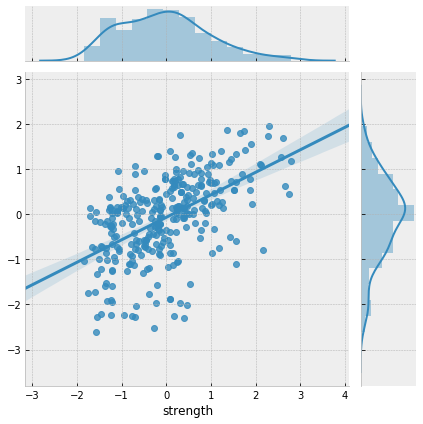

In [120]:
SVR_pca_y_pred = SVR_pca.predict(Xpca_test)
sns.jointplot(y_test,SVR_pca_y_pred,kind='reg')
corr_SVR_pca,p_val_SVR_pca = pearsonr(y_test,SVR_pca_y_pred)
print(f"pearsonr = {corr_SVR_pca}; p_val={p_val_SVR_pca}")

In [121]:
calculatePredictionInterval(y_test,SVR_pca_y_pred)

Prediction Interval: 1.797
95% likelihood that the true value is between -1.589 and 2.005
True Value 0.037041897886180716


In [122]:
SVR_pca_mse,SVR_pca_r2_score, SVR_pca_adj_r2_score = measureError(y_test,SVR_pca_y_pred,Xpca_test)

MSE: 0.8348457433477405
r2Score: 0.12693112669983087
Adj_R2 score: 0.1066271994137804


In [123]:
SVR_pca_dict = {'model_name':'SVR',
            'data_consideration':'considering PCA data',
            'train_score': [SVR_pca_train_score],
            'test_score':[SVR_pca_test_score],
            'corrcoeff':[corr_SVR_pca],
            'p_val':[p_val_SVR_pca],
            'MSE': [SVR_pca_mse],
            'R2_score': [SVR_pca_r2_score],
            'Adj_R2_score':[SVR_pca_adj_r2_score]
           }
df = pd.DataFrame(SVR_pca_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head(20)

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val,MSE,R2_score,Adj_R2_score
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113,0.181210,0.810493,0.805440
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61,0.397300,0.584510,0.573430
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75,0.319797,0.665561,0.656643
0,Decision Tree Regressor,considering DecisionTree important features,0.727600,0.663692,0.815062,9.429331e-75,0.321585,0.663692,0.659267
0,SVR,considering DecisionTree important features,0.863027,0.812201,0.901229,1.622935e-113,0.179577,0.812201,0.809730
0,Linear Regression,considering DecisionTree important features,0.571116,0.522493,0.725353,1.020730e-51,0.456602,0.522493,0.516210
0,Decision Tree Regression,considering PCA data,0.790709,0.221143,0.533199,4.253736e-24,0.744759,0.221143,0.203030
0,SVR,considering PCA data,0.878800,0.126931,0.535363,2.578088e-24,0.834846,0.126931,0.106627


In [124]:
LR_pca = LinearRegression()
LR_pca.fit(Xpca_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
LR_pca_train_score = LR_pca.score(Xpca_train,y_train)
LR_pca_test_score = LR_pca.score(Xpca_test,y_test)
print(f"Train score: {LR_pca_train_score}")
print(f"Test score: {LR_pca_test_score}")

Train score: 0.6139394049515732
Test score: 0.4257181795627122


pearsonr = 0.6647700886162108; p_val=8.945034605687902e-41


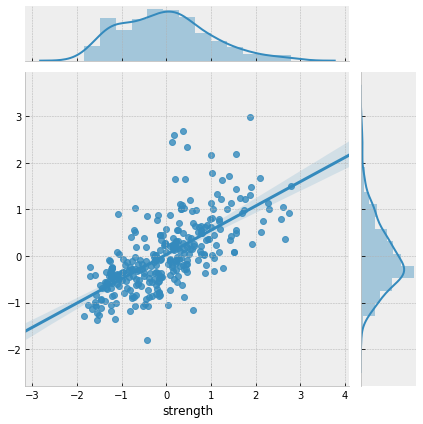

In [126]:
LR_pca_y_pred = LR_pca.predict(Xpca_test)
sns.jointplot(y_test,LR_pca_y_pred,kind='reg')
corr_LR_pca,p_val_LR_pca = pearsonr(y_test,LR_pca_y_pred)
print(f"pearsonr = {corr_LR_pca}; p_val={p_val_LR_pca}")

In [127]:
calculatePredictionInterval(y_test,LR_pca_y_pred)

Prediction Interval: 1.457
95% likelihood that the true value is between -1.249 and 1.665
True Value -0.30276552826667125


In [128]:
LR_pca_mse,LR_pca_r2_score, LR_pca_adj_r2_score = measureError(y_test,LR_pca_y_pred,Xpca_test)

MSE: 0.5491396474390473
r2Score: 0.4257181795627122
Adj_R2 score: 0.41236278838975193


In [129]:
LR_pca_dict = {'model_name':'Linear Regression',
            'data_consideration':'considering PCA data',
            'train_score': [LR_pca_train_score],
            'test_score':[LR_pca_test_score],
            'corrcoeff':[corr_LR_pca],
            'p_val':[p_val_LR_pca],
            'MSE': [LR_pca_mse],
            'R2_score': [LR_pca_r2_score],
            'Adj_R2_score':[LR_pca_adj_r2_score]
           }
df = pd.DataFrame(LR_pca_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head(20)

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val,MSE,R2_score,Adj_R2_score
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113,0.181210,0.810493,0.805440
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61,0.397300,0.584510,0.573430
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75,0.319797,0.665561,0.656643
0,Decision Tree Regressor,considering DecisionTree important features,0.727600,0.663692,0.815062,9.429331e-75,0.321585,0.663692,0.659267
0,SVR,considering DecisionTree important features,0.863027,0.812201,0.901229,1.622935e-113,0.179577,0.812201,0.809730
0,Linear Regression,considering DecisionTree important features,0.571116,0.522493,0.725353,1.020730e-51,0.456602,0.522493,0.516210
0,Decision Tree Regression,considering PCA data,0.790709,0.221143,0.533199,4.253736e-24,0.744759,0.221143,0.203030
0,SVR,considering PCA data,0.878800,0.126931,0.535363,2.578088e-24,0.834846,0.126931,0.106627
0,Linear Regression,considering PCA data,0.613939,0.425718,0.664770,8.945035e-41,0.549140,0.425718,0.412363


In [130]:
# As we can see
# By using all features,
# SVR, Linear Regression and Decsion Tree Regressor models are good.
# In this, SVR model  perforamance good. comapre to Decision Tree and Linear regression.

In [131]:
# Selecting feature from Decision Tree important feature
# SVR, Linear Regression and Decsion Tree Regressor models are performing good.
# Compare to models with whole data, models with decision tree inportant feature are better.
# Int this SVR model performace is good. And we can see correlation- coefficient is high(0.91) comapre to other models.

In [132]:
# Filtering columns using PCA does not help. 
# SVR, Linear Regression and Decsion Tree Regressor are totaly overfitting.
# we can ignore PCA models.

## Let's check with Ridge and Lasso

#### Models with actual data

In [133]:
ridge_model = Ridge(alpha=0.3)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [134]:
ridge_train_score = ridge_model.score(X_train,y_train)
ridge_test_score = ridge_model.score(X_test,y_test)
print(f"Train score: {ridge_train_score}")
print(f"Test score: {ridge_test_score}")

Train score: 0.6271435406496317
Test score: 0.5845968729950811


pearsonr = 0.7669812911196348; p_val=4.138521258830746e-61


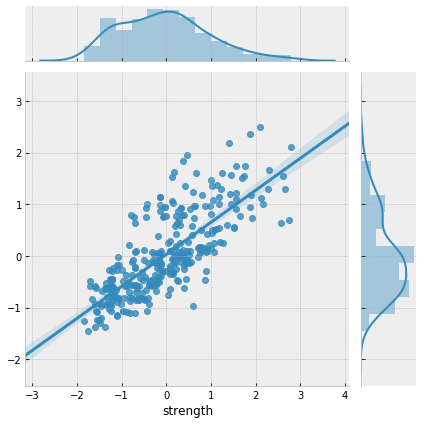

In [135]:
ridge_y_pred = ridge_model.predict(X_test)
sns.jointplot(y_test,ridge_y_pred,kind='reg')
corr_ridge,p_val_ridge = pearsonr(y_test,ridge_y_pred)
print(f"pearsonr = {corr_ridge}; p_val={p_val_ridge}")

In [136]:
print(f"Ridge model coef: {ridge_model.coef_}")

Ridge model coef: [ 0.76844193 -0.1934632   0.1035908   0.08425756  0.10785002  0.4340598
  0.54441181  0.34404074]


In [137]:
ridge_mse,ridge_r2_score, ridge_adj_r2_score = measureError(y_test,ridge_y_pred,X_test)

MSE: 0.397216694992819
r2Score: 0.5845968729950811
Adj_R2 score: 0.5735194562749499


In [138]:
calculatePredictionInterval(y_test,ridge_y_pred)

Prediction Interval: 1.239
95% likelihood that the true value is between -1.031 and 1.447
True Value -0.25487096684289845


In [139]:
ridge_dict = {'model_name':'Ridge',
            'data_consideration':'considering whole data',
            'train_score': [ridge_train_score],
            'test_score':[ridge_test_score],
            'corrcoeff':[corr_ridge],
            'p_val':[p_val_ridge],
            'MSE': [ridge_mse],
            'R2_score': [ridge_r2_score],
            'Adj_R2_score':[ridge_adj_r2_score]
           }
df = pd.DataFrame(ridge_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head(20)

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val,MSE,R2_score,Adj_R2_score
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113,0.181210,0.810493,0.805440
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61,0.397300,0.584510,0.573430
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75,0.319797,0.665561,0.656643
0,Decision Tree Regressor,considering DecisionTree important features,0.727600,0.663692,0.815062,9.429331e-75,0.321585,0.663692,0.659267
0,SVR,considering DecisionTree important features,0.863027,0.812201,0.901229,1.622935e-113,0.179577,0.812201,0.809730
0,Linear Regression,considering DecisionTree important features,0.571116,0.522493,0.725353,1.020730e-51,0.456602,0.522493,0.516210
0,Decision Tree Regression,considering PCA data,0.790709,0.221143,0.533199,4.253736e-24,0.744759,0.221143,0.203030
0,SVR,considering PCA data,0.878800,0.126931,0.535363,2.578088e-24,0.834846,0.126931,0.106627
0,Linear Regression,considering PCA data,0.613939,0.425718,0.664770,8.945035e-41,0.549140,0.425718,0.412363
0,Ridge,considering whole data,0.627144,0.584597,0.766981,4.138521e-61,0.397217,0.584597,0.573519


In [140]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [141]:
lasso_train_score = lasso_model.score(X_train,y_train)
lasso_test_score = lasso_model.score(X_test,y_test)
print(f"Train score: {lasso_train_score}")
print(f"Test score: {lasso_test_score}")

Train score: 0.5419779362534429
Test score: 0.5141480837198735


pearsonr = 0.7382883118705285; p_val=1.9194309695961636e-54


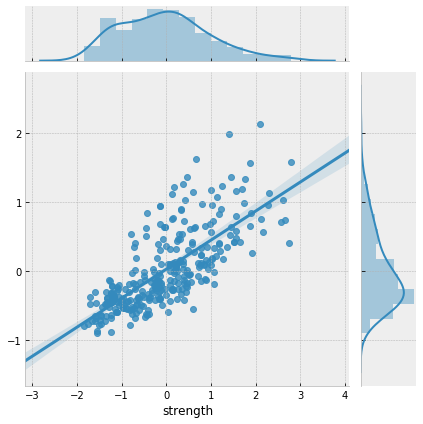

In [142]:
lasso_y_pred = lasso_model.predict(X_test)
sns.jointplot(y_test,lasso_y_pred,kind='reg')
corr_lasso,p_val_lasso = pearsonr(y_test,lasso_y_pred)
print(f"pearsonr = {corr_lasso}; p_val={p_val_lasso}")

In [143]:
print(f"Lasso model coef: {lasso_model.coef_}")

Lasso model coef: [ 0.40410341 -0.13840777  0.18791897 -0.         -0.          0.2801507
  0.16545392  0.        ]


In [144]:
lasso_mse,lasso_r2_score, lasso_adj_r2_score = measureError(y_test,lasso_y_pred,X_test)

MSE: 0.464581222178509
r2Score: 0.5141480837198735
Adj_R2 score: 0.5011920326190702


In [145]:
calculatePredictionInterval(y_test,lasso_y_pred)

Prediction Interval: 1.340
95% likelihood that the true value is between -1.132 and 1.548
True Value 0.047615949902353745


In [146]:
lasso_dict = {'model_name':'Lasso',
            'data_consideration':'considering whole data',
            'train_score': [lasso_train_score],
            'test_score':[lasso_test_score],
            'corrcoeff':[corr_lasso],
            'p_val':[p_val_lasso],
            'MSE': [lasso_mse],
            'R2_score': [lasso_r2_score],
            'Adj_R2_score':[lasso_adj_r2_score]
           }
df = pd.DataFrame(lasso_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head(20)

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val,MSE,R2_score,Adj_R2_score
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113,0.181210,0.810493,0.805440
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61,0.397300,0.584510,0.573430
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75,0.319797,0.665561,0.656643
0,Decision Tree Regressor,considering DecisionTree important features,0.727600,0.663692,0.815062,9.429331e-75,0.321585,0.663692,0.659267
0,SVR,considering DecisionTree important features,0.863027,0.812201,0.901229,1.622935e-113,0.179577,0.812201,0.809730
0,Linear Regression,considering DecisionTree important features,0.571116,0.522493,0.725353,1.020730e-51,0.456602,0.522493,0.516210
0,Decision Tree Regression,considering PCA data,0.790709,0.221143,0.533199,4.253736e-24,0.744759,0.221143,0.203030
0,SVR,considering PCA data,0.878800,0.126931,0.535363,2.578088e-24,0.834846,0.126931,0.106627
0,Linear Regression,considering PCA data,0.613939,0.425718,0.664770,8.945035e-41,0.549140,0.425718,0.412363
0,Ridge,considering whole data,0.627144,0.584597,0.766981,4.138521e-61,0.397217,0.584597,0.573519


In [147]:
from sklearn.preprocessing import PolynomialFeatures

In [148]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [149]:
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.30, random_state=42)

In [150]:
X_train_poly.shape

(721, 37)

In [151]:
lasso_model_poly = Lasso(alpha=0.1)
lasso_model_poly.fit(X_train_poly,y_train_poly)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [152]:
lasso_poly_train_score = lasso_model_poly.score(X_train_poly,y_train_poly)
lasso_poly_test_score = lasso_model_poly.score(X_test_poly,y_test_poly)
print(f"Train score: {lasso_poly_train_score}")
print(f"Test score: {lasso_poly_test_score}")

Train score: 0.5434531129228399
Test score: 0.5156706216276647


In [153]:
print(f"Lasso model coef: {lasso_model_poly.coef_}")

Lasso model coef: [ 0.          0.40374063 -0.13730596  0.18741848 -0.         -0.
  0.28364102  0.16483371  0.         -0.         -0.         -0.
  0.         -0.          0.         -0.          0.         -0.
 -0.         -0.00328107 -0.          0.          0.          0.
  0.          0.         -0.0032354   0.          0.         -0.
  0.          0.          0.          0.          0.          0.
 -0.        ]


pearsonr = 0.7394991364503942; p_val=1.0465190487604263e-54


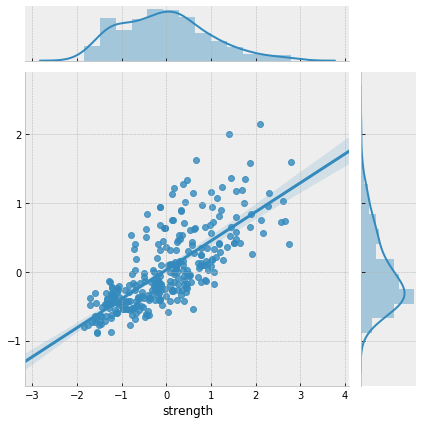

In [154]:
lasso_poly_y_pred = lasso_model_poly.predict(X_test_poly)
sns.jointplot(y_test_poly,lasso_poly_y_pred,kind='reg')
corr_lasso_poly,p_val_lasso_poly = pearsonr(y_test_poly,lasso_poly_y_pred)
print(f"pearsonr = {corr_lasso_poly}; p_val={p_val_lasso_poly}")

In [155]:
lasso_poly_mse,lasso_poly_r2_score, lasso_poly_adj_r2_score = measureError(y_test,lasso_poly_y_pred,X_test_poly)

MSE: 0.46312534128494287
r2Score: 0.5156706216276647
Adj_R2 score: 0.449544470336977


In [156]:
calculatePredictionInterval(y_test,lasso_poly_y_pred)

Prediction Interval: 1.338
95% likelihood that the true value is between -1.130 and 1.546
True Value 0.050666410918737095


In [157]:
lasso_poly_dict = {'model_name':'Lasso poly',
            'data_consideration':'Using PolynomialFeatures',
            'train_score': [lasso_poly_train_score],
            'test_score':[lasso_poly_test_score],
            'corrcoeff':[corr_lasso_poly],
            'p_val':[p_val_lasso_poly],
            'MSE': [lasso_poly_mse],
            'R2_score': [lasso_poly_r2_score],
            'Adj_R2_score':[lasso_poly_adj_r2_score]
           }
df = pd.DataFrame(lasso_poly_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head(20)

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val,MSE,R2_score,Adj_R2_score
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113,0.181210,0.810493,0.805440
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61,0.397300,0.584510,0.573430
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75,0.319797,0.665561,0.656643
0,Decision Tree Regressor,considering DecisionTree important features,0.727600,0.663692,0.815062,9.429331e-75,0.321585,0.663692,0.659267
0,SVR,considering DecisionTree important features,0.863027,0.812201,0.901229,1.622935e-113,0.179577,0.812201,0.809730
0,Linear Regression,considering DecisionTree important features,0.571116,0.522493,0.725353,1.020730e-51,0.456602,0.522493,0.516210
0,Decision Tree Regression,considering PCA data,0.790709,0.221143,0.533199,4.253736e-24,0.744759,0.221143,0.203030
0,SVR,considering PCA data,0.878800,0.126931,0.535363,2.578088e-24,0.834846,0.126931,0.106627
0,Linear Regression,considering PCA data,0.613939,0.425718,0.664770,8.945035e-41,0.549140,0.425718,0.412363
0,Ridge,considering whole data,0.627144,0.584597,0.766981,4.138521e-61,0.397217,0.584597,0.573519


In [158]:
ridge_mode_poly = Ridge(alpha=0.3)
ridge_mode_poly.fit(X_train_poly,y_train_poly)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [159]:
ridge_poly_train_score = ridge_mode_poly.score(X_train_poly,y_train_poly)
ridge_poly_test_score = ridge_mode_poly.score(X_test_poly,y_test_poly)
print(f"Train score: {ridge_poly_train_score}")
print(f"Test score: {ridge_poly_test_score}")

Train score: 0.7770695689225022
Test score: 0.6750048622686797


pearsonr = 0.8268562891934014; p_val=1.0162347901840082e-78


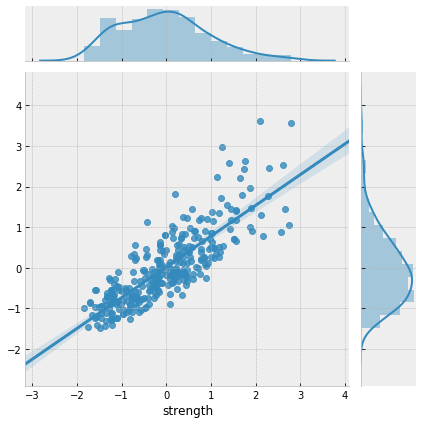

In [160]:
ridge_poly_y_pred = ridge_mode_poly.predict(X_test_poly)
sns.jointplot(y_test_poly,ridge_poly_y_pred,kind='reg')
corr_ridge_poly,p_val_ridge_poly = pearsonr(y_test_poly,ridge_poly_y_pred)
print(f"pearsonr = {corr_ridge_poly}; p_val={p_val_ridge_poly}")

In [161]:
ridge_poly_mse,ridge_poly_r2_score, ridge_poly_adj_r2_score = measureError(y_test,ridge_poly_y_pred,X_test_poly)

MSE: 0.31076678557800647
r2Score: 0.6750048622686797
Adj_R2 score: 0.6306328323939239


In [162]:
calculatePredictionInterval(y_test,ridge_poly_y_pred)

Prediction Interval: 1.096
95% likelihood that the true value is between -0.888 and 1.304
True Value 0.16505736006509808


In [163]:
ridge_poly_dict = {'model_name':'Ridge poly',
            'data_consideration':'Using PolynomialFeatures',
            'train_score': [ridge_poly_train_score],
            'test_score':[ridge_poly_test_score],
            'corrcoeff':[corr_ridge_poly],
            'p_val':[p_val_ridge_poly],
            'MSE': [ridge_poly_mse],
            'R2_score': [ridge_poly_r2_score],
            'Adj_R2_score':[ridge_poly_adj_r2_score]
           }
df = pd.DataFrame(ridge_poly_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head(20)

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val,MSE,R2_score,Adj_R2_score
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113,0.181210,0.810493,0.805440
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61,0.397300,0.584510,0.573430
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75,0.319797,0.665561,0.656643
0,Decision Tree Regressor,considering DecisionTree important features,0.727600,0.663692,0.815062,9.429331e-75,0.321585,0.663692,0.659267
0,SVR,considering DecisionTree important features,0.863027,0.812201,0.901229,1.622935e-113,0.179577,0.812201,0.809730
0,Linear Regression,considering DecisionTree important features,0.571116,0.522493,0.725353,1.020730e-51,0.456602,0.522493,0.516210
0,Decision Tree Regression,considering PCA data,0.790709,0.221143,0.533199,4.253736e-24,0.744759,0.221143,0.203030
0,SVR,considering PCA data,0.878800,0.126931,0.535363,2.578088e-24,0.834846,0.126931,0.106627
0,Linear Regression,considering PCA data,0.613939,0.425718,0.664770,8.945035e-41,0.549140,0.425718,0.412363
0,Ridge,considering whole data,0.627144,0.584597,0.766981,4.138521e-61,0.397217,0.584597,0.573519


In [164]:
# Considering whole data
# Comparing SVR, Linear regression and Dscision Tree Regressor
# SVR is performance is good.

In [165]:
# Considering Decision Tree important features
# Comparing SVR, Linear regression and Dscision Tree Regressor
# SVR is performance is good.
# comparing these models with whole data models, important feature models performance is good.

In [166]:
# Considering PCA data
# all SVR, Linear regression and Dscision Tree Regressor
# SVR is performance very bad. And models are ovefitting.Performance is very bad on test data.

In [167]:
# Considering whole data
# Comparing Lasso and Ridge models and other models these models peorformance is that good.
# SVR is performance is good.

In [168]:
# Considering polynomialFeatures data
# Comparing Lasso and Ridge models and other models these models peorformance is that good.
# But comparing Ridgr and Lasso with whle data model, the performance of polynomialFeature models are better.

In [169]:
# From, analysing the peroformnce of the models on different features using different feature selection methods.
# I go for SVR model with DecisionTreeRegressor.important_fetatures_
# Comapring with other models "SVR with DecisionTreeRegressor.important_fetatures_" performance is good and "corrcoeef" is high.

In [188]:
def percent_95(model):

    values = new_X.join(new_y).values

    n_iterations = 1000        
    n_size = int(len(concrete_cluster_df_z_copy) * 1) 

    scores = list()   
    for i in range(n_iterations):

        temp_train = resample(values, n_samples=n_size) 
        temp_test = np.array([x for x in values if x.tolist() not in temp_train.tolist()])  


        # fit model
        SVR_.fit(temp_train[:,:-1], temp_train[:,-1])
        temp_y_test = temp_test[:,-1] 

        # evaluate model
        predictions = model.predict(temp_test[:, :-1])
        score = model.score(temp_test[:, :-1] , temp_y_test)

        scores.append(score)
    return scores

95.0 confidence interval upper lower limit: (78.99180359297726, 84.8772315995323)
STD:0.42514343295477147 and SSE:55.48931014546246
SVR_ 95% Prediction Interval: 0.8332811285913521
95% likelihood that the true value is between 
[-0.63 -0.66 -0.37 -0.86 -0.62 -2.18 -2.37  0.08 -1.95 -1.78 -0.7  -1.25
 -1.53 -2.11 -1.32  0.63 -0.98 -2.3  -1.64 -0.86 -1.49 -0.36 -1.54 -1.52
 -1.4  -1.09 -1.11 -1.91 -1.8   0.24 -1.6  -1.52 -0.36 -1.8  -1.54 -0.44
  1.04 -0.6  -1.51 -0.46  0.45 -1.47 -0.8  -1.31 -0.61 -1.14 -2.04 -0.54
  1.09 -2.54 -0.89 -0.09  1.05  0.73 -2.44 -2.3   0.   -1.42  0.38 -1.47
 -1.02 -0.21 -1.81  1.29 -2.08 -2.03  0.03  0.87  1.92 -0.48  0.06 -2.08
 -2.09 -0.53 -2.17 -2.39 -1.06 -1.97  1.74 -0.69 -0.98  0.73 -0.36 -0.57
 -0.23  1.07 -2.05 -0.44 -1.93 -1.61 -1.56 -0.05 -1.04  0.41 -1.61  0.31
 -2.04 -1.9  -0.75 -0.12 -2.19 -0.9  -0.5  -1.   -0.86 -0.26 -1.06 -0.62
 -0.84 -1.27 -1.26  0.35 -0.33  0.19 -1.04 -0.45 -1.2  -1.29 -2.31 -1.54
 -2.18 -0.68 -0.71 -0.09 -0.75  1.26  0.05

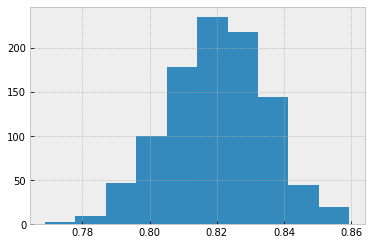

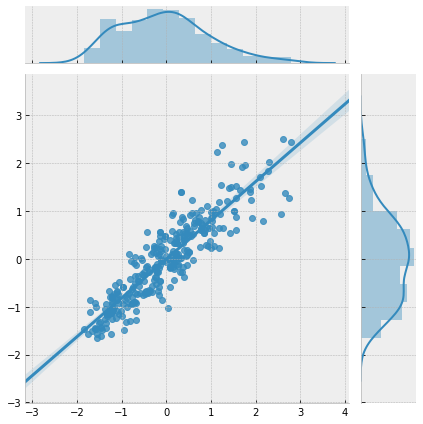

In [189]:
# the choosen model "SVR_" 95% prediciton interval  are:
SVR__scores = percent_95(SVR_)
plt.hist(SVR__scores)

# confidence intervals
alpha = 0.95                              
p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(SVR__scores, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(SVR__scores, p))
print(f'{alpha*100} confidence interval upper lower limit: {lower*100, upper*100}')



y = new_y_test.to_numpy()
y_hat = SVR_y_pred
SSE = sum((y - y_hat)**2)
stdev = np.sqrt(1/(len(y)-2) * SSE)
print(f'STD:{stdev} and SSE:{SSE}')
# calculate prediction interval
interval = 1.96 * stdev  # Here, 1.96 is for 95%
print(f'SVR_ 95% Prediction Interval: {interval}')
lower, upper = y - interval, y + interval
print(f'95% likelihood that the true value is between \n{np.round(lower,2)}\nand\n{np.round(upper,2)}')
print(f'True values:\n{np.round(y_hat,2)}')
sns.jointplot(y,y_hat,kind='reg')